In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pickle
import time

import Dense
import mse
import ReLU
import Sigmoid
import Softmax
import LogLoss

In [2]:
with open('data_train.pickle', 'rb') as d:
    LOADED_DATA = pickle.load(d)

In [3]:
#data preparation

class One_Hot_Encoder:
    def __init__(self, dims):
        self.mat = np.diag(np.ones(dims))
        
    def __call__(self, data):
        return self.mat[int(data)]
    
    
def transform_from_pickle(data):
    encoder = One_Hot_Encoder(10)
    target_after_encoding = [encoder(int(i)) for i in data['target']]
    target = np.array(target_after_encoding)
    return data['data'], target

def train_test_split(data, target, validation_size=0.25, shuffle=True):
    assert len(data) == len(target)
    if shuffle:
        p = np.random.permutation(len(data))
        data = data[p]
        target = target[p]
    partition = int(len(data)*validation_size)
    return (data[:partition], data[partition:],
            target[:partition], target[partition:])

def standartize(data, epsilon=0.0001):
    return (data - np.mean(data, axis=0)) /(np.std(data, axis=0) + epsilon)

8.0

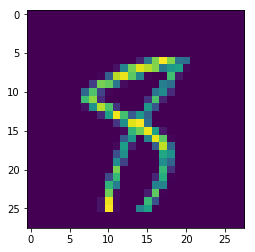

In [4]:
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28))
LOADED_DATA['target'][15]

In [5]:
class net1:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 15, 0.1)
        self.a1 = ReLU.ReLU()
        self.d2 = Dense.Dense(15, 15, 0.1)
        self.a2 = ReLU.ReLU()
        self.d3 = Dense.Dense(15, 10, 0.1)
        self.a3 = Softmax.Softmax()
        self.loss = LogLoss.LogLoss()
    
    def forward(self, x, y=None):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        x = self.d2.forward(x)
        x = self.a2.forward(x)
        x = self.d3.forward(x)
        x = self.a3.forward(x)
        if y is None:
            return x
        return self.loss.forward(x, y)
    
    def backward(self):
        loss = self.loss.backward()
        loss = self.a3.backward(loss)
        loss = self.d3.backward(loss)
        loss = self.a2.backward(loss)
        loss = self.d2.backward(loss)
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)

class net2:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 10000, 0.1)
        self.a1 = Sigmoid.Sigmoid()
        self.d2 = Dense.Dense(10000, 10, 0.1)
        self.a2 = Softmax.Softmax()
        self.loss = LogLoss.LogLoss()
    
    def forward(self, x, y=None):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        x = self.d2.forward(x)
        x = self.a2.forward(x)
        if y is None:
            return x
        return self.loss.forward(x, y)
    
    def backward(self):
        loss = self.loss.backward()
        loss = self.a2.backward(loss)
        loss = self.d2.backward(loss)
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)



In [6]:
n = net2()
train_losses = []
valid_losses = []
DATA, TARGET = transform_from_pickle(LOADED_DATA)
DATA = standartize(DATA)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.72220132e-03 -6.15175274e-03 -4.36393645e-03 -4.35331626e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.35815819e-03 -6.13561365e-03 -7.75664345e-03 -1.16361553e-02
 -1.55312988e-02 -2.00623957e-02 -2.56754587e-02 -3.03022807e-02
 -3.07933757e-02 -3.09911694e-02 -3.28690511e-02 -3.10324961e-02
 -3.03251844e-02 -2.78206563e-02 -2.24557780e-02 -1.88012902e-02
 -1.69911644e-02 -1.09716429e-02 -8.89900734e-03 -4.68262176e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.76372390e-03
 -8.56701076e-03 -1.23302

0.953602778977499
-1.2781483031019878e-18


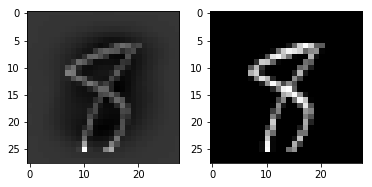

In [7]:
pyplot.subplot(1, 2, 1)
pyplot.imshow(DATA[15].reshape(28,28), cmap='gray')
pyplot.subplot(1, 2, 2)
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28), cmap='gray')
print(DATA[15])
TARGET[15]
print(np.std(DATA))
print(np.mean(DATA))

In [19]:
t1 = time.time()
epochs = 6
for epoch in range(epochs):
    t_start_epoch = time.time()
    train_data, valid_data, train_target, valid_target = train_test_split(DATA, TARGET)
    loss = 0
    for index, (data, target) in enumerate(zip(train_data, train_target)):
        t_start_thousand = time.time()
        loss += n.forward(data, target)
        n.backward()
    train_losses.append(loss)
    loss = 0
    for data, target in zip(valid_data, valid_target):
        loss += n.forward(data, target)
    valid_losses.append(loss)
    t_end_epoch = time.time()
    print('epoch #', epoch, 'time', t_end_epoch - t_start_epoch, 'loss =', loss)
t2 = time.time()
print(t2 - t1)

epoch # 0 time 1326.1828532218933 loss = 128001.59881121379
epoch # 1 time 1336.9094667434692 loss = 128001.57987079842
epoch # 2 time 1317.3493480682373 loss = 128001.54719304806
epoch # 3 time 1369.8263494968414 loss = 128001.55351698253
epoch # 4 time 1316.9463250637054 loss = 128001.62198232856
epoch # 5 time 1283.562415599823 loss = 128001.62360813977
7950.77875828743


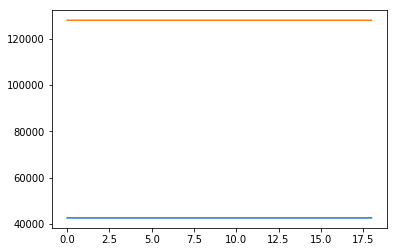

In [20]:
start = 0
pyplot.plot(train_losses[start:])
pyplot.plot(valid_losses[start:])

[[0.09999699 0.09999547 0.10000425 0.0999915  0.10001738 0.10001333
  0.10000796 0.09998492 0.10002495 0.09996325]]
(1, 10)


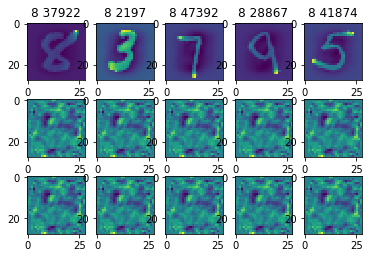

In [21]:
for i in range(5):
    number = np.random.randint(len(DATA))
    pyplot.subplot(3, 5, i+1)
    pyplot.imshow(DATA[number].reshape(28, 28))
    pyplot.title(str(np.argmax(n.forward(DATA[number]))) + ' ' + str(number))
print(n.forward(DATA[number]))
print(n.forward(DATA[number]).shape)
for i in range(10):
    pyplot.subplot(3, 5, i+6)
    pyplot.imshow(np.transpose(n.d1.mt, (1, 0))[i].reshape(28, 28))

[[0.09999699 0.09999547 0.10000425 0.0999915  0.10001738 0.10001333
  0.10000796 0.09998492 0.10002495 0.09996325]]
8


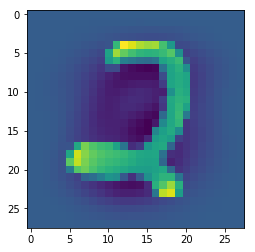

In [15]:
pyplot.imshow(DATA[number].reshape(28, 28))
answer = n.forward(DATA[number])
print(answer)
print(np.argmax(answer))


In [ ]:
np.array((1,2))*np.array((1,3))